# 1.0 Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import math
import calendar
from math import radians
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [2]:
from sklearn.metrics import roc_curve, auc

# 2.0 Reading and Understanding the Data

In [3]:
card = pd.read_csv(r"C:\fraudTest.csv\fraudTest.csv")
card.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
# Let us check if there are null values in the dataset

card.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
# Including only relevant columns/features in a new dataframe

fraudTest = card[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]
fraudTest.head()

trans_date_trans_time    amt gender      lat      long  city_pop  \
0   2020-06-21 12:14:25   2.86      M  33.9659  -80.9355    333497   
1   2020-06-21 12:14:33  29.84      F  40.3207 -110.4360       302   
2   2020-06-21 12:14:53  41.28      F  40.6729  -73.5365     34496   
3   2020-06-21 12:15:15  60.05      M  28.5697  -80.8191     54767   
4   2020-06-21 12:15:17   3.19      M  44.2529  -85.0170      1126   

          dob  merch_lat  merch_long  is_fraud  
0  1968-03-19  33.986391  -81.200714         0  
1  1990-01-17  39.450498 -109.960431         0  
2  1970-10-21  40.495810  -74.196111         0  
3  1987-07-25  28.812398  -80.883061         0  
4  1955-07-06  44.959148  -85.884734         0

*Identifying Target Variable - is_fraud

In [6]:
# Converting columns to datetime for fraudTest

fraudTest.dob = pd.to_datetime(fraudTest['dob'])
fraudTest.trans_date_trans_time = pd.to_datetime(fraudTest['trans_date_trans_time'])

In [7]:
# Creating a new column called Transaction date and converting into datetime

fraudTest['Transaction_Date'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.date
fraudTest.Transaction_Date = pd.to_datetime(fraudTest['Transaction_Date'])

In [8]:
# Creating a new column called Transaction Time

fraudTest['Transaction_Time'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.time


In [9]:
# Creating a new column called Age

fraudTest['Age'] = round((fraudTest['Transaction_Date'] - fraudTest['dob'])/np.timedelta64(1, 'Y'))
fraudTest.Age = fraudTest.Age.astype('int')

In [10]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   amt                    555719 non-null  float64       
 2   gender                 555719 non-null  object        
 3   lat                    555719 non-null  float64       
 4   long                   555719 non-null  float64       
 5   city_pop               555719 non-null  int64         
 6   dob                    555719 non-null  datetime64[ns]
 7   merch_lat              555719 non-null  float64       
 8   merch_long             555719 non-null  float64       
 9   is_fraud               555719 non-null  int64         
 10  Transaction_Date       555719 non-null  datetime64[ns]
 11  Transaction_Time       555719 non-null  object        
 12  Age                    555719 non-null  int3

In [11]:
# Creating a function to calculate the Day of Week

def DoW(x):
    day = datetime.datetime.weekday(x)
    return (calendar.day_name[day])

fraudTest['Day_of_Week'] = fraudTest['Transaction_Date'].apply(DoW)

In [12]:
# # Creating a new column Month

fraudTest['Month'] = pd.DatetimeIndex(fraudTest.trans_date_trans_time).month

# Making Gender column binary

fraudTest['gender'] = fraudTest['gender'].map({'F':1, 'M':0})
fraudTest['Day_of_Week'] = fraudTest['Day_of_Week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})


In [13]:
# Creating a function to calculate the distance between customer's base location and merchant location

def haversineDistance(lat1,lon1,lat2,lon2):
    Lat_Dist = radians(lat2 - lat1)
    Long_Dist = radians(lon2 - lon1)

    ans = (pow(math.sin(Lat_Dist / 2), 2) + pow(math.sin(Long_Dist / 2), 2) * math.cos(lat1) * math.cos(lat2));
    radius = 6371
    cal = 2 * math.asin(math.sqrt(ans))
    return radius * cal

Dist = []
for a,b,c,d in zip(fraudTest['lat'], fraudTest['long'], fraudTest['merch_lat'], fraudTest['merch_long']):
    Dist.append(haversineDistance(a,b,c,d))

fraudTest['Dist'] = Dist
fraudTest.head()


trans_date_trans_time    amt  gender      lat      long  city_pop  \
0   2020-06-21 12:14:25   2.86       0  33.9659  -80.9355    333497   
1   2020-06-21 12:14:33  29.84       1  40.3207 -110.4360       302   
2   2020-06-21 12:14:53  41.28       1  40.6729  -73.5365     34496   
3   2020-06-21 12:15:15  60.05       0  28.5697  -80.8191     54767   
4   2020-06-21 12:15:17   3.19       0  44.2529  -85.0170      1126   

         dob  merch_lat  merch_long  is_fraud Transaction_Date  \
0 1968-03-19  33.986391  -81.200714         0       2020-06-21   
1 1990-01-17  39.450498 -109.960431         0       2020-06-21   
2 1970-10-21  40.495810  -74.196111         0       2020-06-21   
3 1987-07-25  28.812398  -80.883061         0       2020-06-21   
4 1955-07-06  44.959148  -85.884734         0       2020-06-21   

  Transaction_Time  Age  Day_of_Week  Month        Dist  
0         12:14:25   52            7      6   24.748687  
1         12:14:33   30            7      6   98.988771  
2         12:14:53   50            7      6   73.344386  
3         12:15:15   33            7      6   27.746011  
4         12:15:17   65            7      6  105.772207

In [14]:
# Dropping unnecessay columns

fraudTest.drop(['trans_date_trans_time','Transaction_Date','Transaction_Time','dob',
                 'lat','long', 'merch_lat','merch_long'], axis=1, inplace=True)
fraudTest.head()

amt  gender  city_pop  is_fraud  Age  Day_of_Week  Month        Dist
0   2.86       0    333497         0   52            7      6   24.748687
1  29.84       1       302         0   30            7      6   98.988771
2  41.28       1     34496         0   50            7      6   73.344386
3  60.05       0     54767         0   33            7      6   27.746011
4   3.19       0      1126         0   65            7      6  105.772207

# 3.0 `Exploratory Data Analysis`

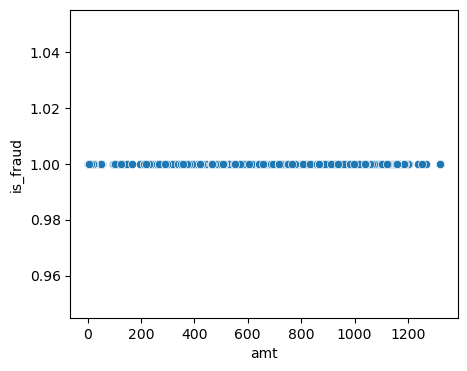

In [15]:
plt.figure(figsize = (5,4))
sns.scatterplot(data = fraudTest[fraudTest['is_fraud'] == 1], x = 'amt', y = 'is_fraud')
plt.show()

Fraud happens at all cost

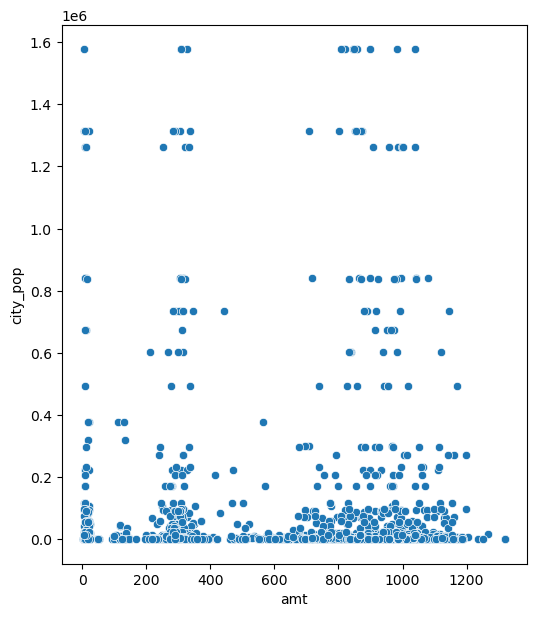

In [16]:
plt.figure(figsize = (6,7))
sns.scatterplot(data = fraudTest[fraudTest['is_fraud'] == 1], x = 'amt', y = 'city_pop')
plt.show()

No clear relation between city population and the amount of spending.

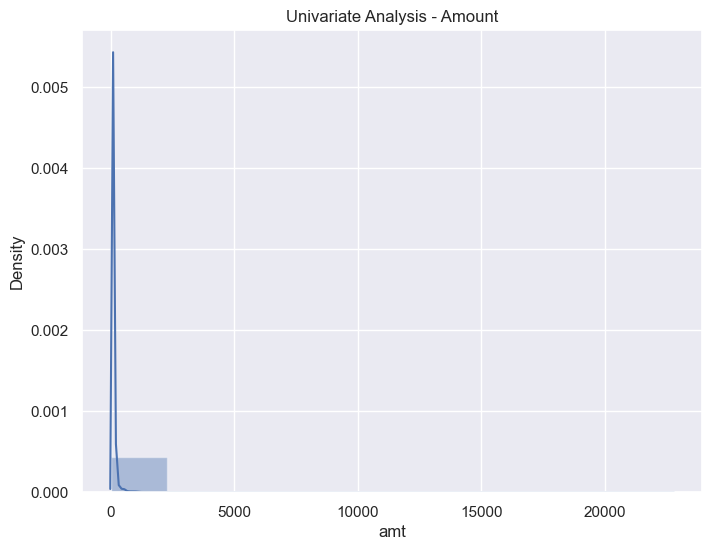

In [17]:
# Checking for amount distribution

plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTest.amt, bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

In [18]:
fraudTest['amt'] = np.log(fraudTest['amt'])

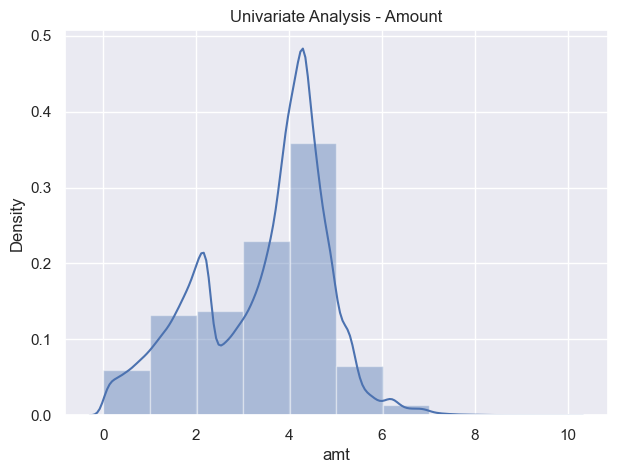

In [19]:
plt.figure(figsize = [7,5])
sns.set_theme()
sns.distplot(fraudTest['amt'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

After treating skewness, the amount column is more normally distributed

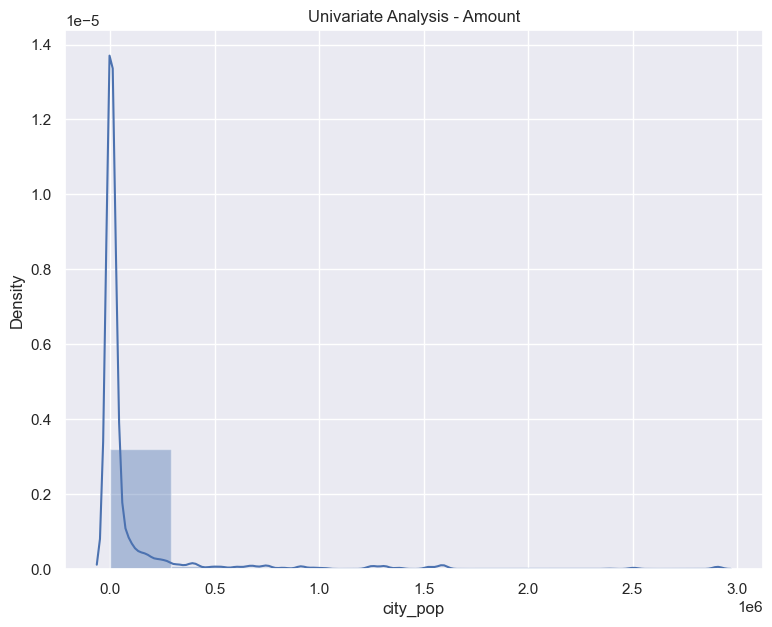

In [20]:
# Checking for population distribution

plt.figure(figsize = [9,7])
sns.set_theme()
sns.distplot(fraudTest['city_pop'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

In [21]:
fraudTest['city_pop'] = np.log(fraudTest['city_pop'])

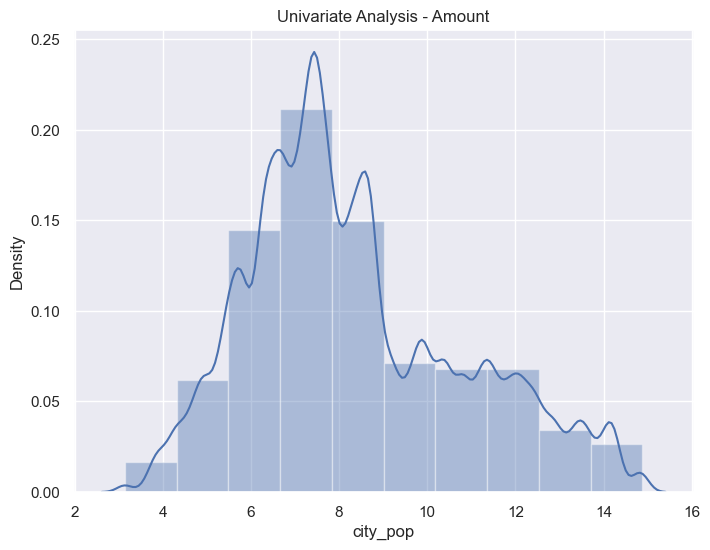

In [22]:
# Checking for population distribution after treating skewness

plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(fraudTest['city_pop'], bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

# The skewness for city population has also been handled

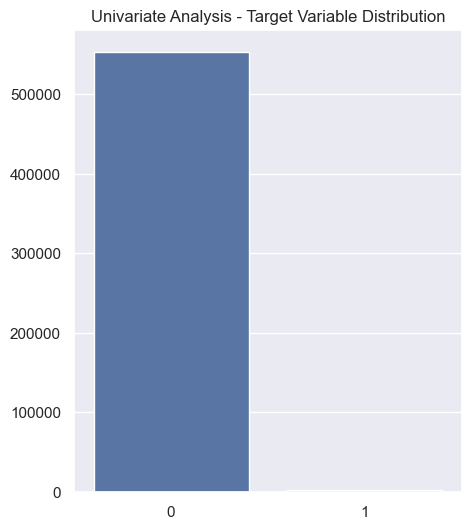

In [23]:
# Let us see the Target Variable distribution across the dataset

x = [0, 1]
y = [fraudTest.is_fraud.value_counts()[0],fraudTest.is_fraud.value_counts()[1]]

plt.figure(figsize = [5,6])
ax = sns.barplot(x = x, y = y)
plt.title('Univariate Analysis - Target Variable Distribution')
plt.show()

#The data shows clear imbalance in the target variable which needs to be handled by sampling methods


Text(0.5, 1.0, 'Univariate Analysis - Gender Distribution')

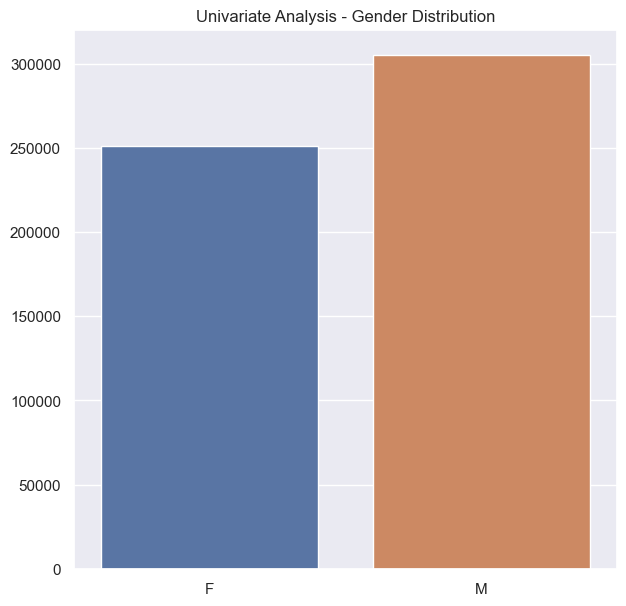

In [24]:
# Let us see the Gender distribution across the dataset

x = ['F', 'M']
y = [fraudTest.gender.value_counts()[0], fraudTest.gender.value_counts()[1]]

plt.figure(figsize = [7,7])
ax = sns.barplot(x = x, y = y)
plt.title('Univariate Analysis - Gender Distribution')

## 3.1Train/Test Data Splitting

In [25]:
y = fraudTest.pop('is_fraud')
X = fraudTest

In [26]:
from sklearn import model_selection

# To handle data imbalance while splitting, using the stratify method

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify = y, random_state=42)

In [27]:
#Confirming shapes of the test and train datasets

X_train.shape, X_test.shape

((416789, 7), (138930, 7))

### Scaling of variables for Logistic Regression

In [28]:
fraudTest.columns

Index(['amt', 'gender', 'city_pop', 'Age', 'Day_of_Week', 'Month', 'Dist'], dtype='object')

In [29]:
# Making a copy of the X_train and scaling it as that is specific only to Logistic Regression

X_train_lr = X_train.copy()

scaler = MinMaxScaler()
X_train_lr[['amt', 'gender', 'city_pop', 'Age', 'Day_of_Week', 'Month', 'Dist']] = scaler.fit_transform(X_train[['amt','gender', 'city_pop', 'Age', 'Day_of_Week', 'Month', 'Dist']])
X_train_lr.head()

amt  gender  city_pop       Age  Day_of_Week     Month      Dist
207436  0.437521     0.0  0.417328  0.370370     0.166667  0.500000  0.521213
235439  0.305470     1.0  0.284059  0.222222     0.000000  0.500000  0.663933
422548  0.451203     1.0  0.785421  0.493827     0.333333  1.000000  0.690935
199537  0.298719     0.0  0.421801  0.938272     1.000000  0.333333  0.355018
158822  0.401877     1.0  0.449390  0.160494     1.000000  0.333333  0.724462

In [30]:
# Confirming if scaling has worked

X_train_lr.describe()

amt         gender       city_pop            Age  \
count  416789.000000  416789.000000  416789.000000  416789.000000   
mean        0.346126       0.547994       0.443749       0.393700   
std         0.138866       0.497692       0.208403       0.215271   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.227208       0.000000       0.295607       0.222222   
50%         0.386805       1.000000       0.395935       0.370370   
75%         0.443121       1.000000       0.574793       0.530864   
max         1.000000       1.000000       1.000000       1.000000   

         Day_of_Week          Month           Dist  
count  416789.000000  416789.000000  416789.000000  
mean        0.454660       0.585042       0.475493  
std         0.362945       0.329772       0.207451  
min         0.000000       0.000000       0.000000  
25%         0.166667       0.333333       0.315633  
50%         0.500000       0.666667       0.490076  
75%         0.833333       1.000000       0.643442  
max         1.000000       1.000000       1.000000

# 4.0 Model Building and Hyperparameter Tuning

> The algorithms that will be used in order to create classification models that would be sensitive to detecting fraudulent transactions are:
- Logistic Regression
- Decision Trees
- Random Forest
- XGBoost

> Each algorithm will have an unsampled model and will then be compared by using sampling methods - SMOTE and ADASYN
> Let us proceed with the model building part in the order mentioned above:

## 4.1 Logistic Regression - Unsampled

In [31]:
logreg_unsampled = LogisticRegression().fit(X_train_lr,y_train)

### Hyperparameter tuning using Grid Search CV

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_1 = GridSearchCV(estimator=logreg_unsampled,
                    param_grid=params_lr,
                    cv=4,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [34]:
%%time
grid_search_1.fit(X_train_lr, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
CPU times: total: 1.81 s
Wall time: 18.1 s


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [35]:
grid_search_1.best_score_

0.0

### Model Evaluation

In [36]:
def evaluate_model_lr_unsampled(classifier):
    y_train_pred = classifier.predict(X_train_lr)
    y_test_pred = classifier.predict(X_test)

    print('Train set performance:')
    print(metrics.recall_score(y_train, y_train_pred))
    print(metrics.confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [37]:
lr_unsampled = grid_search_1.best_estimator_
evaluate_model_lr_unsampled(lr_unsampled)

Train set performance:
0.0
[[415180      0]
 [  1609      0]]
-------------------------
Test set performance:
0.0
[[138392      2]
 [   536      0]]


### ROC Curve

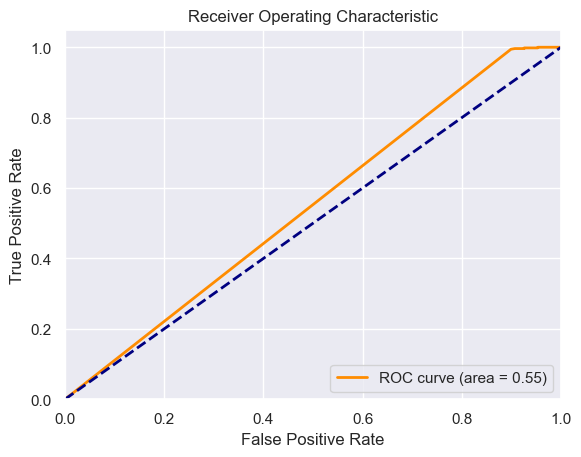

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Logistic Regression - Unsampled:
- Recall on Train: 0.0
- Recall on Test: 0.0
- Area Under the Curve: 0.55

### Let us try out two sampling methods - SMOTE and ADASYN

In [39]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train_smote_lr, y_train_smote_lr = SMOTE().fit_resample(X_train_lr, y_train)
X_train_adasyn_lr, y_train_adasyn_lr = ADASYN().fit_resample(X_train_lr, y_train)

### Logistic Regression with SMOTE

In [40]:
logreg_smote = LogisticRegression().fit(X_train_smote_lr,y_train_smote_lr)

In [41]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_2 = GridSearchCV(estimator=logreg_smote,
                    param_grid=params_lr,
                    cv=4,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [42]:
%%time
grid_search_2.fit(X_train_smote_lr, y_train_smote_lr)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
CPU times: total: 3.02 s
Wall time: 14 s


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [43]:
grid_search_2.best_score_

0.7874921720699456

In [44]:
def evaluate_model_lr_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote_lr)
    y_test_pred = classifier.predict(X_test)

    print('Train set performance:')
    print(metrics.recall_score(y_train_smote_lr, y_train_pred))
    print(metrics.confusion_matrix(y_train_smote_lr, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [45]:
lr_smote = grid_search_2.best_estimator_
evaluate_model_lr_smote(lr_smote)

Train set performance:
0.7873356134688568
[[331063  84117]
 [ 88294 326886]]
-------------------------
Test set performance:
1.0
[[     3 138391]
 [     0    536]]


#### ROC Curve

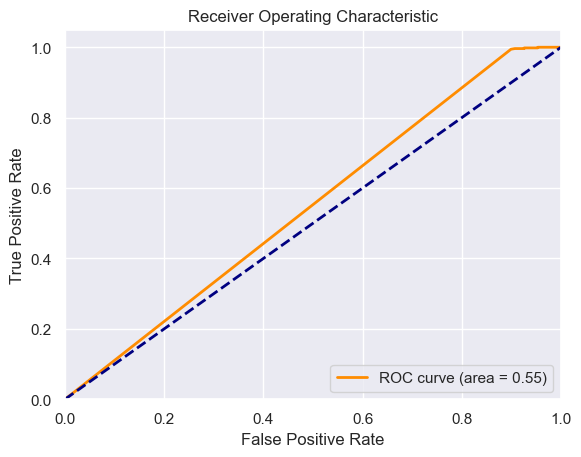

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Logistic Regression - SMOTE:
- Recall on Train: 0.78
- Recall on Test: 1.0
- Area Under the Curve: 0.55

### Logistic Regression with ADASYN

In [47]:
logreg_adasyn = LogisticRegression().fit(X_train_adasyn_lr,y_train_adasyn_lr)

In [48]:
params_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l2']
}

grid_search_3 = GridSearchCV(estimator=logreg_adasyn,
                    param_grid=params_lr,
                    cv=4,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [49]:
%%time
grid_search_3.fit(X_train_adasyn_lr, y_train_adasyn_lr)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
CPU times: total: 3.33 s
Wall time: 14.5 s


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='recall', verbose=1)

In [50]:
grid_search_3.best_score_

0.7439593986845019

In [51]:
def evaluate_model_lr_adasyn(classifier):
    y_train_pred = classifier.predict(X_train_adasyn_lr)
    y_test_pred = classifier.predict(X_test)

    print('Train set performance:')
    print(metrics.recall_score(y_train_adasyn_lr, y_train_pred))
    print(metrics.confusion_matrix(y_train_adasyn_lr, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [52]:
lr_adasyn = grid_search_3.best_estimator_
evaluate_model_lr_adasyn(lr_adasyn)

Train set performance:
0.7438895790598908
[[312936 102244]
 [106377 308979]]
-------------------------
Test set performance:
1.0
[[    54 138340]
 [     0    536]]


#### ROC Curve

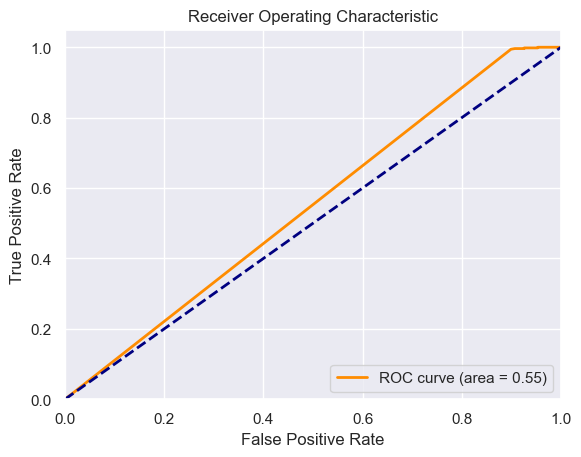

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Logistic Regression - ADASYN:
- Recall on Train: 0.74
- Recall on Test: 1.0
- Area Under the Curve: 0.55

# 4.2 Decision Tree Classifier - Unsampled

In [54]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

### Creating Helper Functions

In [55]:
def get_graph(classifier):
    dot_data = StringIO()

    export_graphviz(classifier, out_file = dot_data, filled = True, rounded = True,
               feature_names=X.columns,
               class_names=['No Fraud', 'Fraud'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [56]:
def evaluate_model_unsampled(classifier):
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    print('Train set performance:')
    print(recall_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

### Hyper-parameter tuning using Grid Search CV

In [57]:
dt_unsampled = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

#### After various trial and error methods, fixing hyper-parameters to:

In [58]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini']
}

grid_search_4 = GridSearchCV(estimator=dt_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [59]:
%%time
grid_search_4.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 2.23 s
Wall time: 10.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110]},
             scoring='recall', verbose=1)

In [60]:
grid_search_4.best_score_

0.1827093129002922

In [61]:
dt_best = grid_search_4.best_estimator_
evaluate_model_unsampled(dt_best)

Train set performance:
0.24052206339341206
[[415002    178]
 [  1222    387]]
-------------------------
Test set performance:
0.22014925373134328
[[138342     52]
 [   418    118]]


In [62]:
grid_search_4.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 80}

In [63]:
pip install graphviz

In [64]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0





Solving environment: ...working... done

# All requested packages already installed.



In [65]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




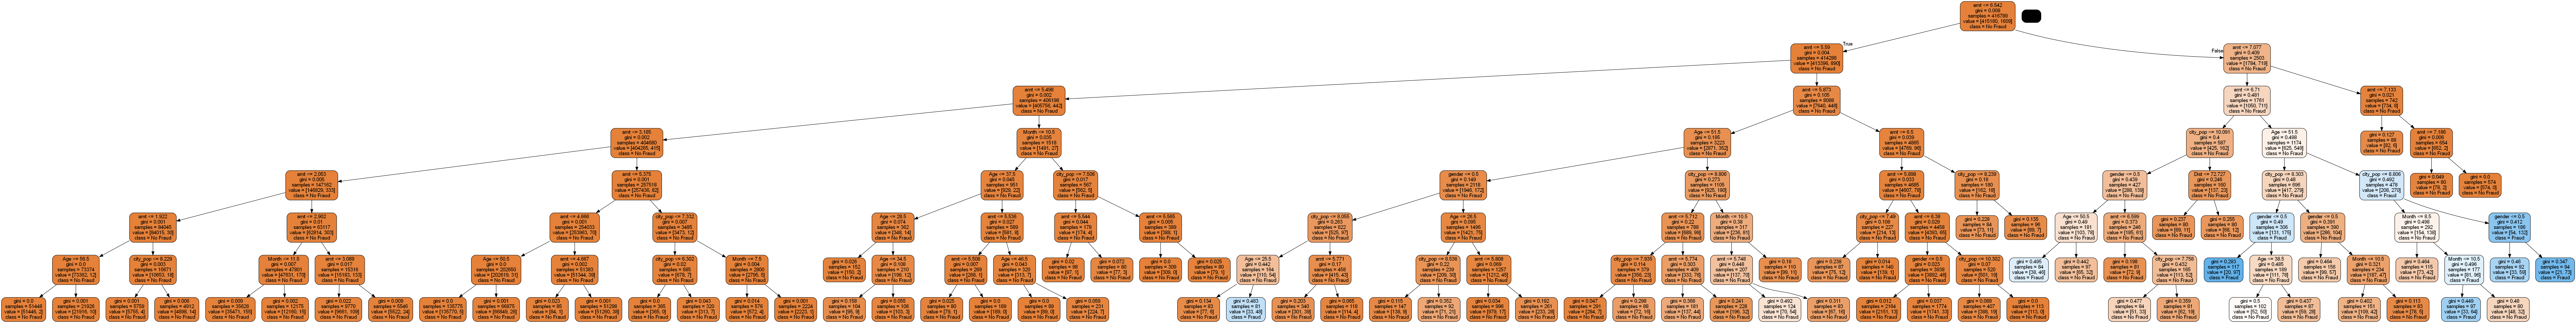

In [66]:
gph = get_graph(dt_best)
Image(gph.create_png())

#### ROC Curve

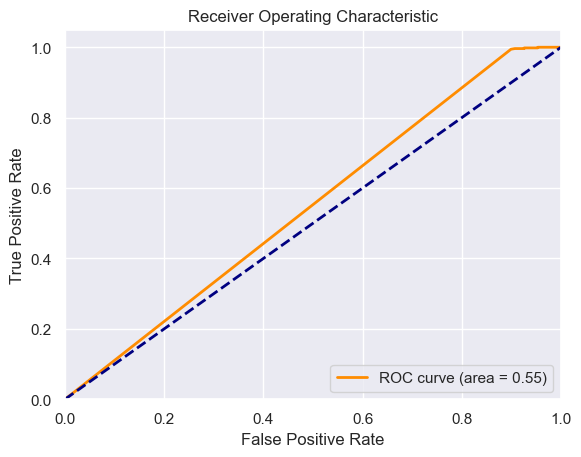

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Decision Trees - Unsampled:
- Recall on Train: 0.24
- Recall on Test: 0.22
- Area Under the Curve: 0.55

### Decision Tree with SMOTE

In [68]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

In [69]:
dt_smote = DecisionTreeClassifier(random_state=42).fit(X_train_smote,y_train_smote)

### Creating Helper Functions

In [70]:
def evaluate_model_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote)
    y_test_pred = classifier.predict(X_test)

    print('Train set performance:')
    print(recall_score(y_train_smote, y_train_pred))
    print(confusion_matrix(y_train_smote, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [71]:
params = {
    'max_depth': [8],
    'min_samples_leaf': [90,120],
    'criterion': ['gini']
}

grid_search_5 = GridSearchCV(estimator=dt_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [72]:
%%time
grid_search_5.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 6.5 s
Wall time: 26.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8],
                         'min_samples_leaf': [90, 120]},
             scoring='recall', verbose=1)

In [73]:
grid_search_5.best_score_

0.8300472084397128

In [74]:
dt_smote = grid_search_5.best_estimator_
evaluate_model_smote(dt_smote)

Train set performance:
0.8180524110024567
[[386668  28512]
 [ 75541 339639]]
-------------------------
Test set performance:
0.832089552238806
[[128882   9512]
 [    90    446]]


In [75]:
grid_search_5.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 90}


(process:21352): GLib-GIO-WARNING **: 14:32:10.987: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:21352): GLib-GIO-WARNING **: 14:32:11.129: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



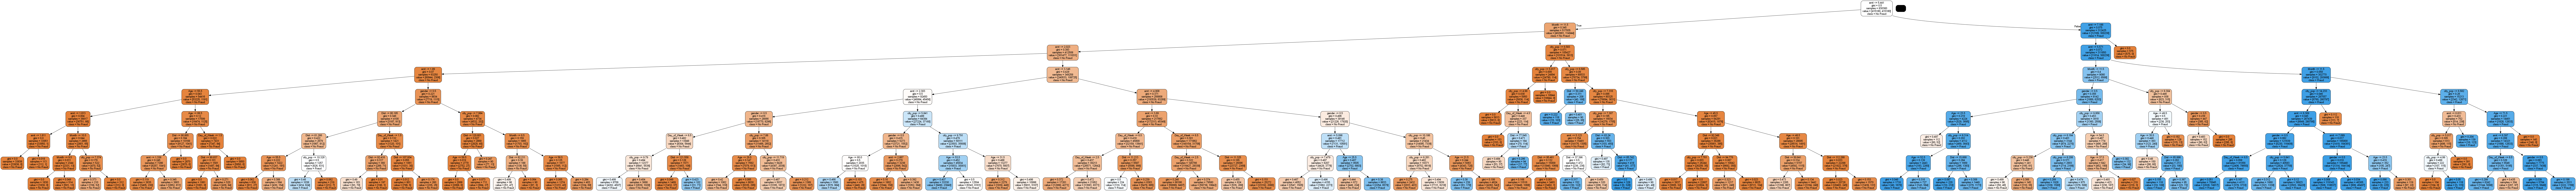

In [76]:
gph = get_graph(dt_smote)
Image(gph.create_png())

#### ROC Curve

In [77]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

def get_graph(classifier, X):
    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=X.columns,
                    class_names=['No Fraud', 'Fraud'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

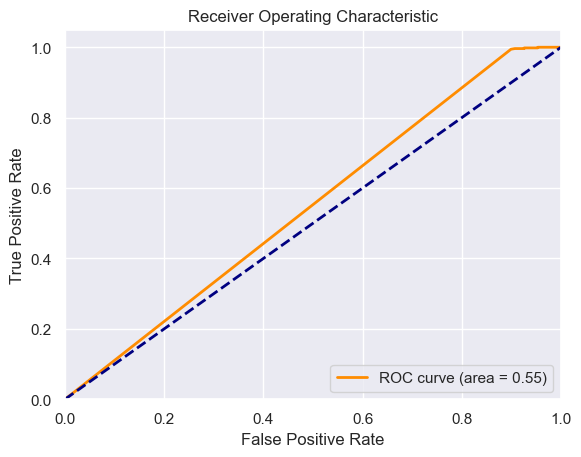

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Decision Trees - SMOTE:
- Recall on Train: 0.84
- Recall on Test: 0.86
- Area Under the Curve: 0.55

### Decision Tree with ADASYN

In [79]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_resample(X_train, y_train)

### Creating Helper Functions

In [80]:
def evaluate_model_adasyn(classifier):
    y_train_pred = classifier.predict(X_train_adasyn)
    y_test_pred = classifier.predict(X_test)

    print('Train set performance:')
    print(recall_score(y_train_adasyn, y_train_pred))
    print(confusion_matrix(y_train_adasyn, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [81]:
dt_adasyn = DecisionTreeClassifier(random_state=42).fit(X_train_adasyn,y_train_adasyn)

In [82]:
params = {
    'max_depth': [8],
    'min_samples_leaf': [90,120],
    'criterion': ['gini']
}

grid_search_6 = GridSearchCV(estimator=dt_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [83]:
%%time
grid_search_6.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 6.25 s
Wall time: 25.8 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8],
                         'min_samples_leaf': [90, 120]},
             scoring='recall', verbose=1)

In [84]:
grid_search_6.best_score_

0.8322523151772059

In [85]:
dt_adasyn = grid_search_6.best_estimator_
evaluate_model_adasyn(dt_adasyn)

Train set performance:
0.8432929105600983
[[373278  41902]
 [ 65064 350131]]
-------------------------
Test set performance:
0.8656716417910447
[[124444  13950]
 [    72    464]]


In [86]:
grid_search_6.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 90}


(process:15368): GLib-GIO-WARNING **: 14:32:58.521: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:15368): GLib-GIO-WARNING **: 14:32:58.646: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



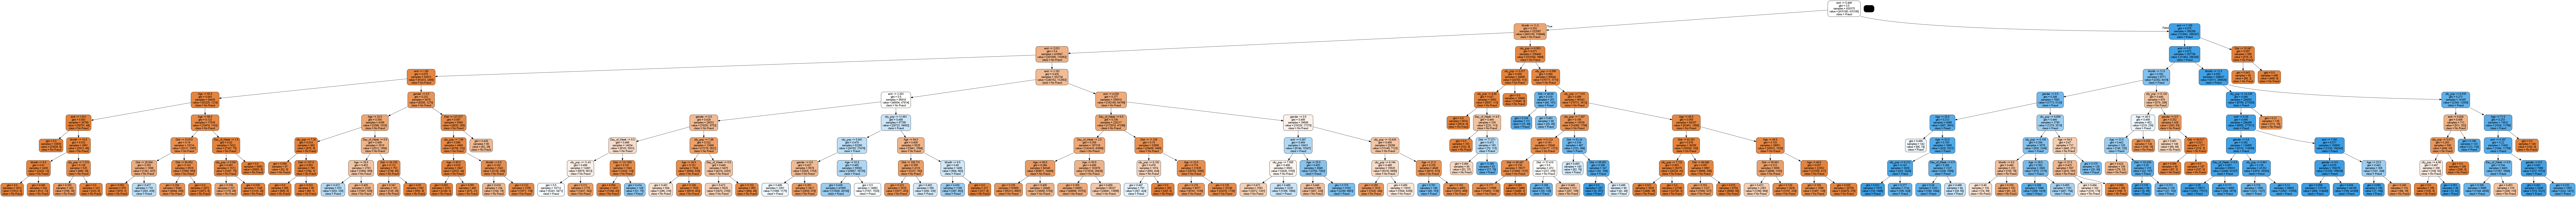

In [87]:
gph = get_graph(dt_adasyn, X)  # Pass both classifier and data to the function

# Display the graph
Image(gph.create_png())

#### ROC Curve

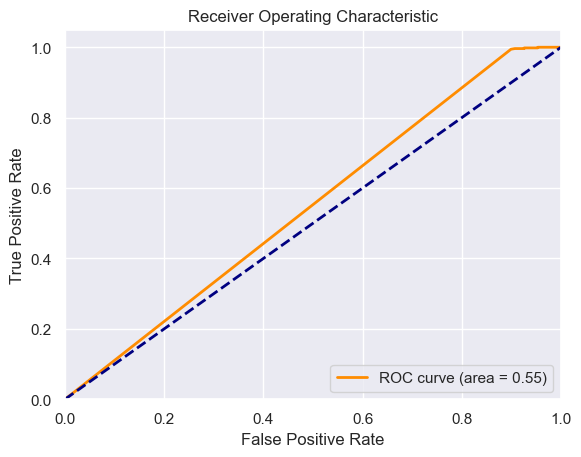

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Decision Trees - ADASYN:
- Recall on Train: 0.84
- Recall on Test: 0.86
- Area Under the Curve: 0.55

# 4.3 Random Forest - Unsampled

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_unsampled = RandomForestClassifier(random_state=42).fit(X_train, y_train)

#### After various trial and error methods, fixing hyper-parameters to:

In [91]:
# Applying same parameters as the ones finalised in Decision Trees and building up on the n_estimators:


params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_7 = GridSearchCV(estimator=rf_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [92]:
%%time
grid_search_7.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 5.41 s
Wall time: 1min 25s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [93]:
rf_best = grid_search_7.best_estimator_
evaluate_model_unsampled(rf_best)

Train set performance:
0.053449347420758235
[[415172      8]
 [  1523     86]]
-------------------------
Test set performance:
0.04291044776119403
[[138386      8]
 [   513     23]]


In [94]:
grid_search_7.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 10}

#### ROC Curve

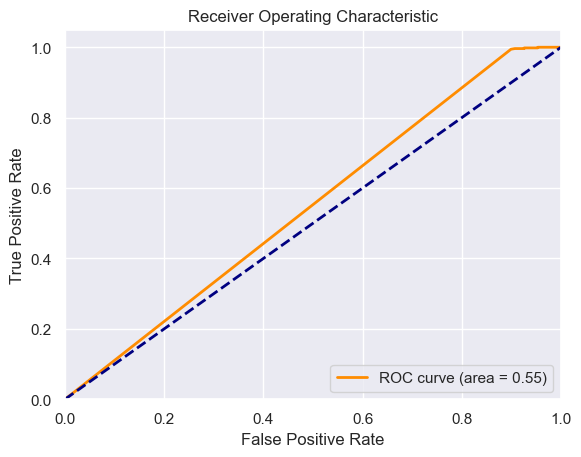

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Random Forest - Unsampled:
- Recall on Train: 0.053
- Recall on Test: 0.042
- Area Under the Curve: 0.55

### Random Forest - SMOTE

In [96]:
rf_smote = RandomForestClassifier(random_state=42).fit(X_train_smote, y_train_smote)

In [97]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_8 = GridSearchCV(estimator=rf_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [98]:
%%time
grid_search_8.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 45.1 s
Wall time: 5min


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [99]:
rf_smote = grid_search_8.best_estimator_
evaluate_model_smote(rf_smote)

Train set performance:
0.7467219037525893
[[403567  11613]
 [105156 310024]]
-------------------------
Test set performance:
0.7444029850746269
[[134595   3799]
 [   137    399]]


In [100]:
grid_search_8.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 110,
 'n_estimators': 30}

ROC Curve

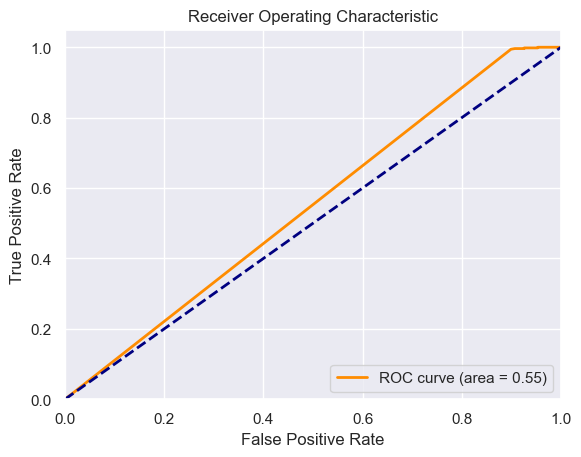

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Random Forest - SMOTE:
- Recall on Train: 0.74
- Recall on Test: 0.74
- Area Under the Curve: 0.55

### Random Forest - ADASYN

In [102]:
rf_adasyn = RandomForestClassifier(random_state=42).fit(X_train_adasyn, y_train_adasyn)

In [103]:
# Applying same parameters as the ones finalised in Decision Trees and building up on the n_estimators:

params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_9 = GridSearchCV(estimator=rf_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [104]:
%%time
grid_search_9.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 41.7 s
Wall time: 4min 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [105]:
grid_search_9.best_score_

0.7459121617553198

In [106]:
rf_adasyn = grid_search_9.best_estimator_
evaluate_model_adasyn(rf_adasyn)

Train set performance:
0.7470513854935633
[[403194  11986]
 [105023 310172]]
-------------------------
Test set performance:
0.746268656716418
[[134481   3913]
 [   136    400]]


In [107]:
grid_search_9.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 30}

#### ROC Curve

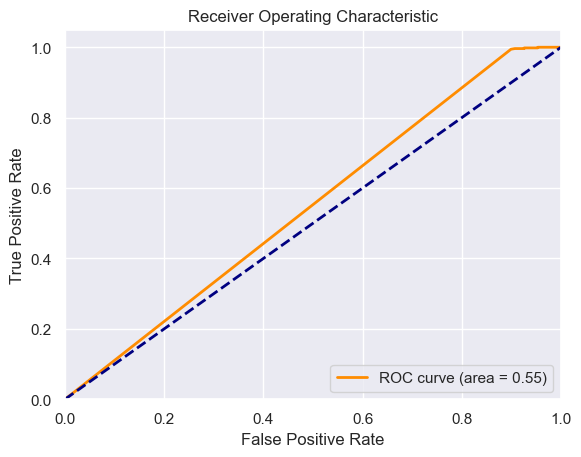

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

 Metrics for Random Forest - ADASYN:
- Recall on Train: 0.74
- Recall on Test: 0.74
- Area Under the Curve: 0.55

# 4.4 XGBoost - Unsampled

###### from xgboost import XGBClassifier

In [110]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [113]:
from xgboost import XGBClassifier

# Now you can create an instance of XGBClassifier and fit the model
xgb_unsampled = XGBClassifier().fit(X_train, y_train)

In [114]:
# Applying same parameters as the ones finalised in Decision Trees and building up on the learning_rate:

params = {
    'max_depth': [7],
    'min_samples_leaf': [80],
    'criterion': ['gini'],
    'n_estimators': [15],
    'learning_rate': [0.1,0.3,0.5]
}

grid_search_10 = GridSearchCV(estimator=xgb_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [115]:
%%time
grid_search_10.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 2.97 s
Wall time: 8.97 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [7],
                         'min_samples_leaf': [80], 'n_estimators': [15]},
             scoring='recall', verbose=1)

In [116]:
xgb_best_unsampled = grid_search_10.best_estimator_
evaluate_model_unsampled(xgb_best_unsampled)

Train set performance:
0.34369173399627095
[[415117     63]
 [  1056    553]]
-------------------------
Test set performance:
0.27052238805970147
[[138342     52]
 [   391    145]]


In [117]:
grid_search_10.best_params_

{'criterion': 'gini',
 'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 15}

#### ROC Curve

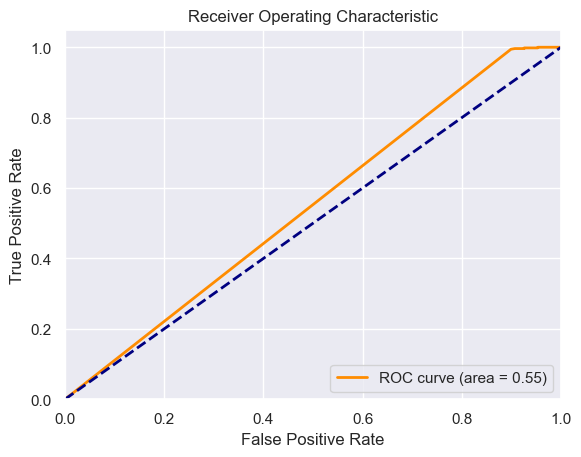

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for XGBoost - Unsampled:
- Recall on Train: 0.34
- Recall on Test: 0.27
- Area Under the Curve: 0.55

### XGBoost - SMOTE

In [119]:
xgb_smote = XGBClassifier().fit(X_train_smote, y_train_smote)

In [120]:
# Applying same parameters as the ones finalised in Decision Trees and building up on the learning_rate:

params = {
    'max_depth': [7],
    'min_samples_leaf': [80],
    'criterion': ['gini'],
    'n_estimators': [15],
    'learning_rate': [0.1,0.3,0.5]
}

grid_search_11 = GridSearchCV(estimator=xgb_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [121]:
%%time
grid_search_11.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 5.59 s
Wall time: 8.99 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [7],
                         'min_samples_leaf': [80], 'n_estimators': [15]},
             scoring='recall', verbose=1)

In [122]:
xgb_best_smote = grid_search_11.best_estimator_
evaluate_model_smote(xgb_best_smote)

Train set performance:
0.9103545450166193
[[393166  22014]
 [ 37219 377961]]
-------------------------
Test set performance:
0.8488805970149254
[[131019   7375]
 [    81    455]]


In [123]:
grid_search_11.best_params_

{'criterion': 'gini',
 'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 15}

#### ROC Curve

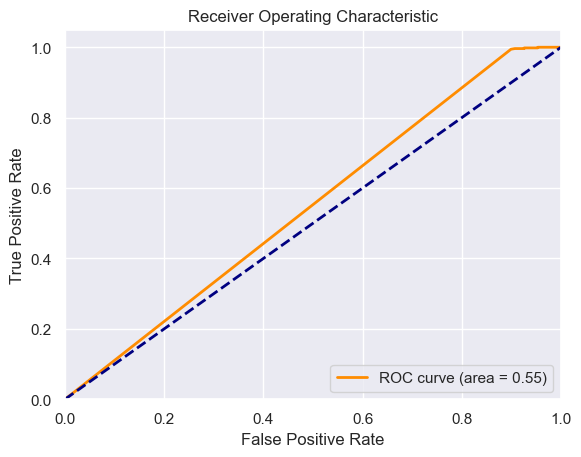

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for XGBoost - SMOTE:
- Recall on Train: 0.91
- Recall on Test: 0.85
- Area Under the Curve: 0.55

### XGBoost - ADASYN

In [125]:
xgb_adasyn = XGBClassifier().fit(X_train_adasyn, y_train_adasyn)

In [126]:
# Applying same parameters as the ones finalised in Decision Trees and building up on the learning_rate:

params = {
    'max_depth': [7],
    'min_samples_leaf': [80],
    'criterion': ['gini'],
    'n_estimators': [15],
    'learning_rate': [0.1,0.3,0.5]
}
grid_search_12 = GridSearchCV(estimator=xgb_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [127]:
%%time
grid_search_12.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 5.42 s
Wall time: 8.72 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [7],
                         'min_samples_leaf': [80], 'n_estimators': [15]},
             scoring='recall', verbose=1)

In [128]:
xgb_best_adasyn = grid_search_12.best_estimator_
evaluate_model_adasyn(xgb_best_adasyn)

Train set performance:
0.9151386697816688
[[392686  22494]
 [ 35234 379961]]
-------------------------
Test set performance:
0.8264925373134329
[[130853   7541]
 [    93    443]]


In [129]:
type(xgb_best_adasyn)

xgboost.sklearn.XGBClassifier

In [130]:
grid_search_12.best_params_

{'criterion': 'gini',
 'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 15}

#### ROC Curve

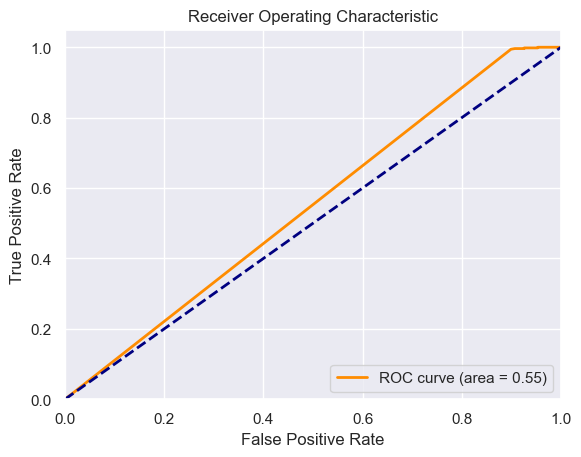

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model logreg_unsampled
# and have X_test and y_test as your test data
y_pred_prob = logreg_unsampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

> #### Metrics for Random Forest - SMOTE:
- Recall on Train: 0.91
- Recall on Test: 0.82
- Area Under the Curve: 0.55

# 5.0 Testing the results on the unseen Test Data

In [133]:
# Reading the test dataset

df_test = pd.read_csv(r"C:\fraudTest.csv\fraudTest.csv")
df_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [134]:
# Considering only the relevant columns/features in a new dataframe

fraudTest = df_test[['trans_date_trans_time','amt','gender','lat','long','city_pop','dob','merch_lat','merch_long','is_fraud']]
fraudTest.head()

trans_date_trans_time    amt gender      lat      long  city_pop  \
0   2020-06-21 12:14:25   2.86      M  33.9659  -80.9355    333497   
1   2020-06-21 12:14:33  29.84      F  40.3207 -110.4360       302   
2   2020-06-21 12:14:53  41.28      F  40.6729  -73.5365     34496   
3   2020-06-21 12:15:15  60.05      M  28.5697  -80.8191     54767   
4   2020-06-21 12:15:17   3.19      M  44.2529  -85.0170      1126   

          dob  merch_lat  merch_long  is_fraud  
0  1968-03-19  33.986391  -81.200714         0  
1  1990-01-17  39.450498 -109.960431         0  
2  1970-10-21  40.495810  -74.196111         0  
3  1987-07-25  28.812398  -80.883061         0  
4  1955-07-06  44.959148  -85.884734         0

In [135]:
# Converting columns to datetime for fraudTest

fraudTest.dob = pd.to_datetime(fraudTest['dob'])
fraudTest.trans_date_trans_time = pd.to_datetime(fraudTest['trans_date_trans_time'])

In [136]:
# Creating a new column called Transaction date and converting into datetime

fraudTest['Transaction_Date'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.date
fraudTest.Transaction_Date = pd.to_datetime(fraudTest['Transaction_Date'])

In [137]:
# Creating a new column called Transaction Time

fraudTest['Transaction_Time'] = pd.to_datetime(fraudTest['trans_date_trans_time'], format='%Y:%M:%D').dt.time

In [138]:
# Creating a new column called Age

fraudTest['Age'] = round((fraudTest['Transaction_Date'] - fraudTest['dob'])/np.timedelta64(1, 'Y'))
fraudTest.Age = fraudTest.Age.astype('int')

In [139]:
fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   amt                    555719 non-null  float64       
 2   gender                 555719 non-null  object        
 3   lat                    555719 non-null  float64       
 4   long                   555719 non-null  float64       
 5   city_pop               555719 non-null  int64         
 6   dob                    555719 non-null  datetime64[ns]
 7   merch_lat              555719 non-null  float64       
 8   merch_long             555719 non-null  float64       
 9   is_fraud               555719 non-null  int64         
 10  Transaction_Date       555719 non-null  datetime64[ns]
 11  Transaction_Time       555719 non-null  object        
 12  Age                    555719 non-null  int3

In [140]:
# Calling the function created earlier to calculate the Day of the Week

fraudTest['Day_of_Week'] = fraudTest['Transaction_Date'].apply(DoW)

In [141]:
# Creating a new column Month

fraudTest['Month'] = pd.DatetimeIndex(fraudTest.trans_date_trans_time).month

# Making Gender column binary

fraudTest['gender'] = fraudTest['gender'].map({'F':1, 'M':0})

# Ensuring Day of Week is represented numerically
fraudTest['Day_of_Week'] = fraudTest['Day_of_Week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})

In [142]:
# Calling the function created earlier to calculate the Distance between the customer's home location and
# the location of transactions (fraudulent or otherwise)

Dist2 = []
for a,b,c,d in zip(fraudTest['lat'], fraudTest['long'], fraudTest['merch_lat'], fraudTest['merch_long']):
    Dist2.append(haversineDistance(a,b,c,d))

In [143]:
# Adding the calculated Distance column in the test dataframe

fraudTest['Dist'] = Dist2
fraudTest.head()

trans_date_trans_time    amt  gender      lat      long  city_pop  \
0   2020-06-21 12:14:25   2.86       0  33.9659  -80.9355    333497   
1   2020-06-21 12:14:33  29.84       1  40.3207 -110.4360       302   
2   2020-06-21 12:14:53  41.28       1  40.6729  -73.5365     34496   
3   2020-06-21 12:15:15  60.05       0  28.5697  -80.8191     54767   
4   2020-06-21 12:15:17   3.19       0  44.2529  -85.0170      1126   

         dob  merch_lat  merch_long  is_fraud Transaction_Date  \
0 1968-03-19  33.986391  -81.200714         0       2020-06-21   
1 1990-01-17  39.450498 -109.960431         0       2020-06-21   
2 1970-10-21  40.495810  -74.196111         0       2020-06-21   
3 1987-07-25  28.812398  -80.883061         0       2020-06-21   
4 1955-07-06  44.959148  -85.884734         0       2020-06-21   

  Transaction_Time  Age  Day_of_Week  Month        Dist  
0         12:14:25   52            7      6   24.748687  
1         12:14:33   30            7      6   98.988771  
2         12:14:53   50            7      6   73.344386  
3         12:15:15   33            7      6   27.746011  
4         12:15:17   65            7      6  105.772207

In [144]:
# Dropping unnecessary columns

fraudTest.drop(['trans_date_trans_time','Transaction_Date','Transaction_Time','dob',
                 'lat','long', 'merch_lat','merch_long'], axis=1, inplace=True)
fraudTest.head()

amt  gender  city_pop  is_fraud  Age  Day_of_Week  Month        Dist
0   2.86       0    333497         0   52            7      6   24.748687
1  29.84       1       302         0   30            7      6   98.988771
2  41.28       1     34496         0   50            7      6   73.344386
3  60.05       0     54767         0   33            7      6   27.746011
4   3.19       0      1126         0   65            7      6  105.772207

# 6.0 Model Selection and Model Building
> Based on the Recall scores, AUC Scores, and Confusion Matrices collected from the 12 algorithms (4 algorithms - unsampled and sampled), following is the summary of all values to help us pick the best model of all:

In [145]:
summary_dict = {
    'Model': ['Logistic Regression - Unsampled', 'Logistic Regression - SMOTE', 'Logistic Regression - ADASYN',
             'Decision Trees - Unsampled', 'Decision Trees - SMOTE', 'Decision Trees - ADASYN',
             'Random Forest - Unsampled', 'Random Forest - SMOTE', 'Random Forest - ADASYN',
             'XGBoost - Unsampled', 'XGBoost - SMOTE', 'XGBoost - ADASYN'],
    'Recall on Train' : [0.0,0.78,0.73,0.30,0.85,0.84,0.12,0.79,0.78,0.41,0.87,0.86],
    'Recall on Test' : [0.99,1.0,1.0,0.28,0.84,0.85,0.11,0.77,0.77,0.36,0.81,0.81],
    'AUC Score' : [0.52,0.56,0.60,0.73,0.94,0.93,0.96,0.91,0.92,0.98,0.95,0.95]
}

summary_df = pd.DataFrame(summary_dict)
summary_df

Model  Recall on Train  Recall on Test  \
0   Logistic Regression - Unsampled             0.00            0.99   
1       Logistic Regression - SMOTE             0.78            1.00   
2      Logistic Regression - ADASYN             0.73            1.00   
3        Decision Trees - Unsampled             0.30            0.28   
4            Decision Trees - SMOTE             0.85            0.84   
5           Decision Trees - ADASYN             0.84            0.85   
6         Random Forest - Unsampled             0.12            0.11   
7             Random Forest - SMOTE             0.79            0.77   
8            Random Forest - ADASYN             0.78            0.77   
9               XGBoost - Unsampled             0.41            0.36   
10                  XGBoost - SMOTE             0.87            0.81   
11                 XGBoost - ADASYN             0.86            0.81   

    AUC Score  
0        0.52  
1        0.56  
2        0.60  
3        0.73  
4        0.94  
5        0.93  
6        0.96  
7        0.91  
8        0.92  
9        0.98  
10       0.95  
11       0.95

In [146]:
summary_df.sort_values('AUC Score', ascending = False)

Model  Recall on Train  Recall on Test  \
9               XGBoost - Unsampled             0.41            0.36   
6         Random Forest - Unsampled             0.12            0.11   
10                  XGBoost - SMOTE             0.87            0.81   
11                 XGBoost - ADASYN             0.86            0.81   
4            Decision Trees - SMOTE             0.85            0.84   
5           Decision Trees - ADASYN             0.84            0.85   
8            Random Forest - ADASYN             0.78            0.77   
7             Random Forest - SMOTE             0.79            0.77   
3        Decision Trees - Unsampled             0.30            0.28   
2      Logistic Regression - ADASYN             0.73            1.00   
1       Logistic Regression - SMOTE             0.78            1.00   
0   Logistic Regression - Unsampled             0.00            0.99   

    AUC Score  
9        0.98  
6        0.96  
10       0.95  
11       0.95  
4        0.94  
5        0.93  
8        0.92  
7        0.91  
3        0.73  
2        0.60  
1        0.56  
0        0.52

#### we can see in above XGBoost-SMOTE  &  XGBoost-ADASYN model is best model.

In [165]:
pred = xgb_best_adasyn.predict(X_train_adasyn)

### Testing the unseen data by using XGBoost - ADASYN Modelled Predictors:

In [166]:
print(recall_score(y_final_adasyn, y_pred_final))
print(confusion_matrix(y_final_adasyn, y_pred_final))

0.9503060811494486
[[521147  32427]
 [ 27503 525945]]


### Let's check the Recall Score and Confusion Matrix on the final test data

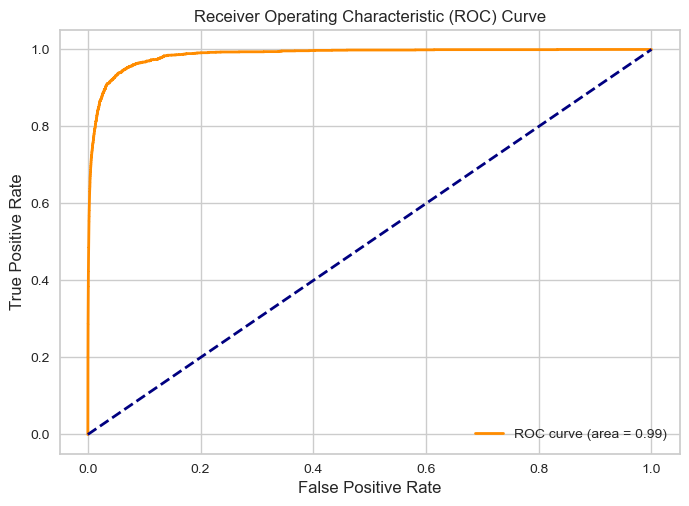

In [175]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming xgb_final_adasyn is your trained classifier
y_scores = xgb_final_adasyn.predict_proba(X_final)
fpr, tpr, _ = roc_curve(y_final, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

> ## XGBoost - ADASYN model has 94.8% or approx 95% Sensitivity towards predicting Fraudulent Transactions

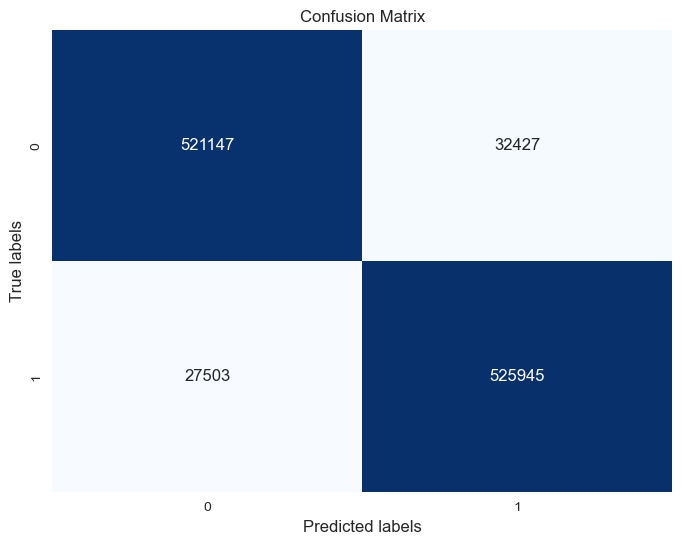

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming cnf is your confusion matrix, replace this with your actual confusion matrix
# cnf = confusion_matrix(y_true, y_pred)
# y_true: true labels, y_pred: predicted labels
# Example:
# cnf = confusion_matrix(y_final_adasyn, y_pred_final)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


> # 7.0 `Cost Benefit Analysis`
- The Cost Benefit Analysis is to be done on the original data
- Merging the train and test data to make an original dataframe

In [178]:
fraud = pd.concat([card, df_test], axis=0)
fraud.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

#### Let us take a look at what we need to do in order to perform the cost-benefit analysis step by step:
- ### Part I: Analyse the dataset and find the following figures:

> 1. Average number of transactions per month 
> 2. Average number of fraudulent transactions per month
> 3. Average amount per fraudulent transaction 

In [180]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
# Total transactions can be found by checking the shape of the original dataframe
# Avg transactions per month would be to divide that shape/total by 24 (months)

avg_transactions_pm = fraud.shape[0]//24

In [181]:
print("1. Average number of transactions per month are:", avg_transactions_pm)

1. Average number of transactions per month are: 46309


In [182]:
# Checking only for fraudulent transactions:

fraud[fraud.is_fraud == 1].head()

Unnamed: 0 trans_date_trans_time            cc_num  \
1685        1685   2020-06-21 22:06:39  3560725013359375   
1767        1767   2020-06-21 22:32:22  6564459919350820   
1781        1781   2020-06-21 22:37:27  6564459919350820   
1784        1784   2020-06-21 22:38:55  4005676619255478   
1857        1857   2020-06-21 23:02:16  3560725013359375   

                                 merchant        category      amt    first  \
1685                 fraud_Hamill-D'Amore  health_fitness    24.84   Brooke   
1767    fraud_Rodriguez, Yost and Jenkins        misc_net   780.52  Douglas   
1781                     fraud_Nienow PLC   entertainment   620.33  Douglas   
1784  fraud_Heathcote, Yost and Kertzmann    shopping_net  1077.69  William   
1857               fraud_Hermann and Sons    shopping_pos   842.65   Brooke   

        last gender                        street  ...      lat      long  \
1685   Smith      F     63542 Luna Brook Apt. 012  ...  31.8599 -102.7413   
1767  Willis      M    619 Jeremy Garden Apt. 681  ...  42.5545  -90.3508   
1781  Willis      M    619 Jeremy Garden Apt. 681  ...  42.5545  -90.3508   
1784   Perry      M  458 Phillips Island Apt. 768  ...  30.4590  -90.9027   
1857   Smith      F     63542 Luna Brook Apt. 012  ...  31.8599 -102.7413   

      city_pop                       job         dob  \
1685        23            Cytogeneticist  1969-09-15   
1767      1306  Public relations officer  1958-09-10   
1781      1306  Public relations officer  1958-09-10   
1784     71335                 Herbalist  1994-05-31   
1857        23            Cytogeneticist  1969-09-15   

                             trans_num   unix_time  merch_lat  merch_long  \
1685  16bf2e46c54369a8eab2214649506425  1371852399  32.575873 -102.604290   
1767  ab4b379d2c0c9c667d46508d4e126d72  1371853942  42.461127  -91.147148   
1781  47a9987ae81d99f7832a54b29a77bf4b  1371854247  42.771834  -90.158365   
1784  fe956c7e4a253c437c18918bf96f7b62  1371854335  31.204974  -90.261595   
1857  f6838c01f5d2262006e6b71d33ba7c6d  1371855736  31.315782 -102.736390   

      is_fraud  
1685         1  
1767         1  
1781         1  
1784         1  
1857         1  

[5 rows x 23 columns]

In [183]:
# Fraudulent transactions are 9651 (number of rows) that are spread across 24 months
# Avg fraudulent transactions per month would be to divide the shape/total fraudulent rows by 24 (months)

avg_fraudtrans_pm = fraud[fraud.is_fraud == 1].shape[0]//24

In [184]:
print("2. Average number of fraudulent transactions per month are:", avg_fraudtrans_pm)

2. Average number of fraudulent transactions per month are: 178


In [185]:
# Average amount of fraud is the total fraudulent amount divided by the total number of fraudulent transactions

avg_fraud_amt = fraud[fraud.is_fraud == 1].amt.sum()//fraud[fraud.is_fraud == 1].shape[0]

In [186]:
print("3. Average amount per fraudulent transactions is:", avg_fraud_amt)

3. Average amount per fraudulent transactions is: 528.0


### Part II: Compare the cost incurred per month by the bank before and after the model deployment:

1. Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month
2. Cost incurred per month after the model is built and deployed: (Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below)
 

- Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = USD 1.5

- Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.
- Let FN be the average number of transactions per month that are fraudulent but not detected by the model 

- Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
- Therefore, the cost incurred per month after the model is built and deployed = 1.5 * TF + Average amount per fraudulent transaction * FN
- Final savings = Cost incurred before - Cost incurred after

In [187]:
# Calculating the cost incurred before deploying the model based on the first point descibed above:

cost_before_model = avg_fraud_amt*avg_fraudtrans_pm
cost_before_model

93984.0

In [189]:
cnf

array([[521147,  32427],
       [ 27503, 525945]], dtype=int64)

In [190]:
TP = cnf[0,0]
FP = cnf[0,1]
FN = cnf[1,0]
TN = cnf[1,1]

In [191]:
avg_fraudtrans_pm

178

In [192]:
FN/7

3929.0

In [193]:
TP/7

74449.57142857143

In [194]:
cost_before_model

93984.0

In [195]:
(((TP/(TP+FN))*FP)/7)*1.5

6600.31783299267

### By Indrajeet Chaudhray & Raviraj 